In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
data_file = pd.ExcelFile('ECT.xlsx')

In [2]:
PartyList = data_file.parse(sheet_name='result_constituencies_PartyList', header=0)
Candidate = data_file.parse(sheet_name='result_constituencies_Candidate', header=0, usecols=[0,2,3,4,5])
constituency = data_file.parse(sheet_name='info_constituency',header=0)

In [3]:
#Candidate['cons_id'].value_counts()
#PartyList['cons_id'].value_counts()

In [4]:
result_All = pd.merge(PartyList,Candidate, on=('cons_id','party_id'), how='outer')
#print(result_All['cons_id'].value_counts()[result_All['cons_id'].value_counts()>67])

In [5]:
unique_result = [list(set( result_All[result_All['cons_id']=='CMI_7']['party_id'] ) - set ( PartyList[PartyList['cons_id']=='CMI_7']['party_id']))[0],
                list(set( result_All[result_All['cons_id']=='NMA_1']['party_id'] ) - set ( PartyList[PartyList['cons_id']=='NMA_1']['party_id']))[0],
                list(set( result_All[result_All['cons_id']=='PNB_4']['party_id'] ) - set ( PartyList[PartyList['cons_id']=='PNB_4']['party_id']))[0],
                list(set( result_All[result_All['cons_id']=='CMI_6']['party_id'] ) - set ( PartyList[PartyList['cons_id']=='CMI_6']['party_id']))[0]]

In [6]:
result_All = result_All.drop(result_All.index[result_All['party_id']==unique_result[1]])
result_All = result_All.drop(result_All.index[result_All['party_id']==unique_result[2]])
result_All = result_All.drop(result_All.index[result_All['party_id']==unique_result[3]])

In [7]:
#print(result_All[result_All['party_list_vote_percent']>99])
result_All = result_All.drop(result_All.index[result_All['cons_id']=='NST_6'])

In [8]:
#print(result_All[result_All['mp_app_vote_percent']>99])

In [9]:
#result_All_party_id_726 = result_All[result_All['party_id']==726]
#result_All_party_id_726 = result_All_party_id_726[['cons_id','party_id','party_list_vote_percent','mp_app_vote_percent']]
#sns.pairplot(result_All_party_id_726,hue='party_id')

In [10]:
#result_All_party_id_763 = result_All[result_All['party_id']==763]
#result_All_party_id_763 = result_All_party_id_763[['cons_id','party_id','party_list_vote_percent','mp_app_vote_percent']]
#sns.pairplot(result_All_party_id_763,hue='party_id')

In [11]:
#result_726_763_705 = result_All_party_id_726.append(result_All_party_id_763,ignore_index=True)
#result_726_763_705 = result_726_763_705.append(result_All[result_All['party_id']==705],ignore_index=True)
#sns.pairplot(result_726_763_705,hue='party_id')

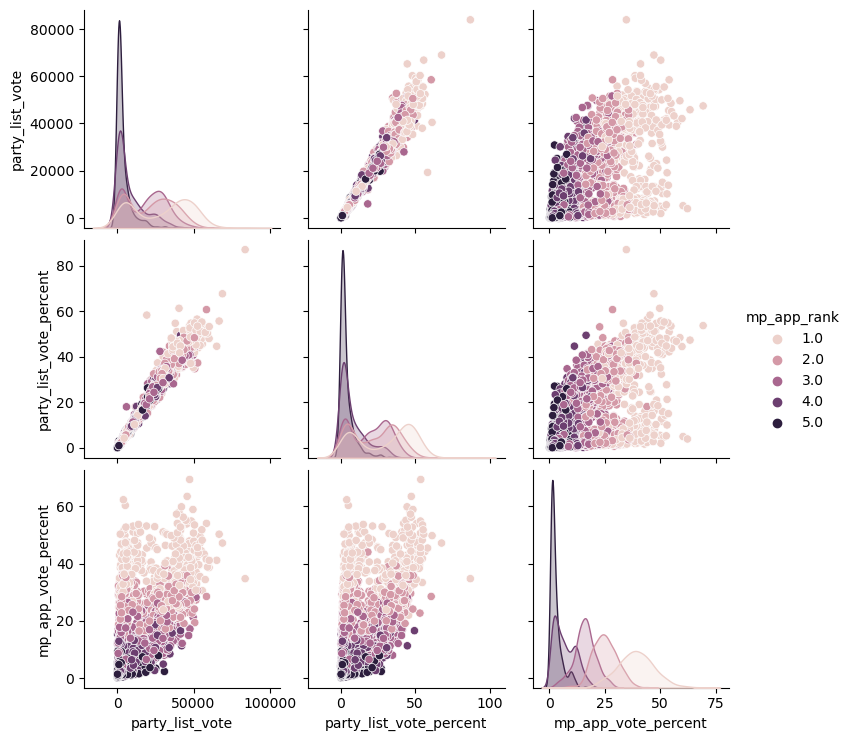

In [12]:
result_mp = result_All[result_All['mp_app_rank']<=5]
result_mp = result_mp.drop('party_id', axis=1)
result_mp = result_mp.drop('mp_app_vote', axis=1)
sns.pairplot(result_mp,hue='mp_app_rank')

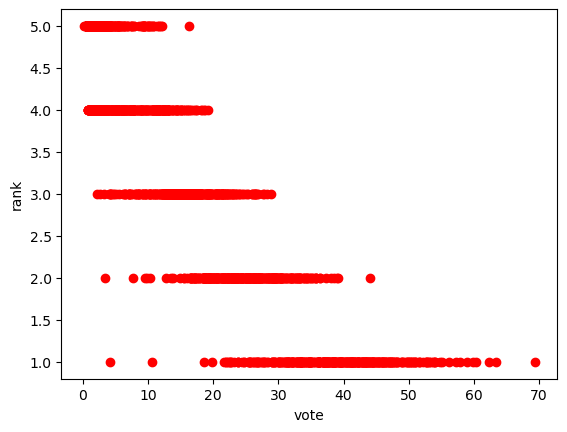

In [13]:
rank = result_mp['mp_app_rank'].values.reshape(-1,1) 
vote = result_mp['mp_app_vote_percent'].values.reshape(-1,1)
plt.ylabel('rank')
plt.xlabel('vote')
plt.plot(vote,rank,'or')
plt.show()

In [14]:
train_rank,test_rank,train_vote,test_vote = train_test_split(rank,vote, test_size=0.2,random_state = 42)

In [15]:
print('Size of x training:',len(train_vote))
print('Size of y training:',len(train_rank))
print('Size of x testing:',len(test_vote))
print('Size of y testing:',len(test_rank))

Size of x training: 1595
Size of y training: 1595
Size of x testing: 399
Size of y testing: 399


In [16]:
model_linear = LinearRegression()
model_linear.fit(train_vote,train_rank)

print("Theta0: ",model_linear.intercept_[0])
print("Theta1: ",model_linear.coef_[0][0])
print("y = {:.4f}+{:.4f}x".format(model_linear.intercept_[0],model_linear.coef_[0][0]))

Theta0:  4.6044314188327125
Theta1:  -0.09009888795745533
y = 4.6044+-0.0901x


In [17]:
y_pred = model_linear.predict(train_rank)

c:\Users\fifa-\anaconda3\envs\allpython\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3629 (\N{THAI CHARACTER O ANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\fifa-\anaconda3\envs\allpython\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3633 (\N{THAI CHARACTER MAI HAN-AKAT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\fifa-\anaconda3\envs\allpython\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\fifa-\anaconda3\envs\allpython\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3604 (\N{THAI CHARACTER DO DEK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\fifa-\anaconda3\envs\allpython\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3610 (\N{THAI CHARACTER BO BAIMAI}) missing

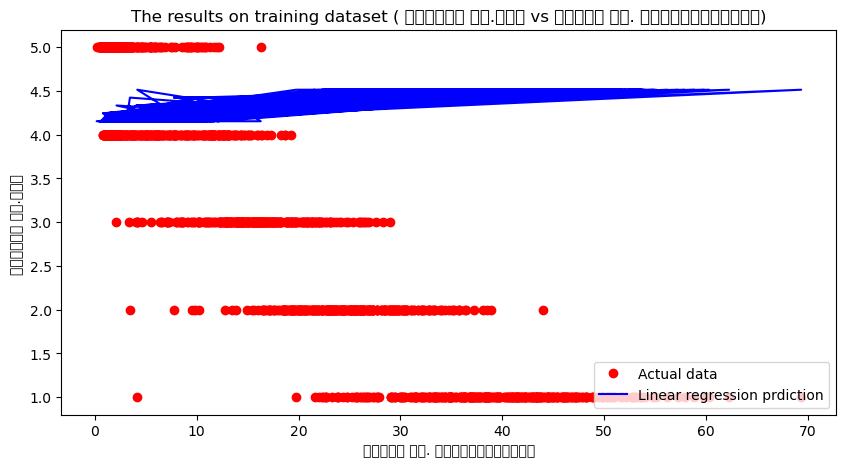

In [18]:
#Predict on trainig set
y_pred = model_linear.predict(train_rank)

#Plot lineae regression line vs actual data on training set
plt.figure(figsize = (10,5))
plt.title('The results on training dataset ( อันดับ สส.เขต vs คะแนน สส. บัญชีรายชื่อ)')
plt.xlabel('คะแนน สส. บัญชีรายชื่อ')
plt.ylabel('อันดับ สส.เขต ')
plt.plot(train_vote,train_rank,'or',label = 'Actual data')
plt.plot(train_vote,y_pred,'-b',label="Linear regression prdiction")
plt.legend(loc="lower right")
plt.show()